# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.077016e+01     7.099970e+00
 * time: 0.0017120838165283203
     1     2.776218e+01     4.512457e+00
 * time: 0.0064890384674072266
     2     1.935778e+01     4.836689e+00
 * time: 0.01180410385131836
     3     1.343812e+01     3.448865e+00
 * time: 0.017058134078979492
     4     1.157216e+01     3.099052e+00
 * time: 0.02149510383605957
     5     1.066942e+01     2.204533e+00
 * time: 0.05390596389770508
     6     9.501471e+00     1.473333e+00
 * time: 0.05660605430603027
     7     8.777708e+00     1.091840e+00
 * time: 0.059127092361450195
     8     8.440348e+00     7.715083e-01
 * time: 0.06161093711853027
     9     8.403502e+00     1.330032e+00
 * time: 0.06386399269104004
    10     8.303916e+00     1.135657e+00
 * time: 0.06653308868408203
    11     8.271293e+00     1.160964e+00
 * time: 0.06931710243225098
    12     8.137761e+00     6.803516e-01
 * time: 0.07297110557556152
    13     8.048212e+00     6.851147e-01
 *

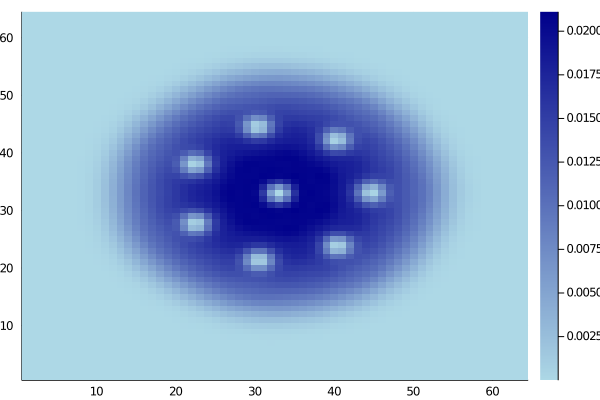

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)